In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Superstore_dataset_clean.csv', encoding="ISO-8859-1")

In [3]:
df.drop(columns='Row ID',inplace=True)

In [4]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,CA-2016-161389,12-05-2016,12-10-2016,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922
3,CA-2016-117590,12-08-2016,12-10-2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
4,CA-2016-117590,12-08-2016,12-10-2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630


**Standardizing the column names**

In [5]:
df.columns=[col.lower().strip().replace(' ','_') for col in df.columns]

In [6]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
2,CA-2016-161389,12-05-2016,12-10-2016,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,Washington,98103,West,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922
3,CA-2016-117590,12-08-2016,12-10-2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
4,CA-2016-117590,12-08-2016,12-10-2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       2739 non-null   object 
 1   order_date     2739 non-null   object 
 2   ship_date      2739 non-null   object 
 3   ship_mode      2739 non-null   object 
 4   customer_id    2739 non-null   object 
 5   customer_name  2739 non-null   object 
 6   segment        2739 non-null   object 
 7   country        2739 non-null   object 
 8   city           2739 non-null   object 
 9   state          2739 non-null   object 
 10  postal_code    2739 non-null   int64  
 11  region         2739 non-null   object 
 12  product_id     2739 non-null   object 
 13  category       2739 non-null   object 
 14  sub-category   2739 non-null   object 
 15  product_name   2739 non-null   object 
 16  sales          2739 non-null   float64
 17  quantity       2739 non-null   int64  
 18  discount

In [8]:
df[['sales','quantity','discount','profit']].describe()

,sales,quantity,discount,profit
count,2739.000000,2739.000000,2739.000000,2739.000000
mean,230.971407,3.767798,0.158759,31.325717
std,629.384413,2.205670,0.206339,244.168288
min,0.556000,1.000000,0.000000,-3839.990400
25%,17.902000,2.000000,0.000000,1.828050
50%,58.240000,3.000000,0.200000,8.773500
75%,200.387500,5.000000,0.200000,30.599900
max,17499.950000,14.000000,0.800000,8399.976000


**Adding a column total_sales**

In [9]:
df['total_sales']=df['sales']*df['quantity']

# Analysis

**1)Top products performing in each region**

In [11]:
df.loc[df.groupby(['region'])['total_sales'].idxmax(),['region','product_name','total_sales']].reset_index(drop=True)

,region,product_name,total_sales
0,Central,Canon imageCLASS 2200 Advanced Copier,87499.750
1,East,Hewlett Packard LaserJet 3310 Copier,48599.190
2,South,HP Designjet T520 Inkjet Large Format Printer ...,43749.750
3,West,Apple iPhone 5,33271.296


**2)Total sales in each region**

In [14]:
df.groupby('region')['total_sales'].sum().sort_values(ascending=False)


region
West       939404.2750
East       841080.2370
Central    762956.0500
South      531398.0165
Name: total_sales, dtype: float64

**3)Top 10 performing products**

In [20]:
df.sort_values('total_sales',ascending=False).head(10)[['product_name','total_sales']].reset_index(drop=True)

,product_name,total_sales
0,Canon imageCLASS 2200 Advanced Copier,87499.750
1,Lexmark MX611dhe Monochrome Laser Printer,65279.616
2,Hewlett Packard LaserJet 3310 Copier,48599.190
3,HP Designjet T520 Inkjet Large Format Printer ...,43749.750
4,Ativa V4110MDD Micro-Cut Shredder,34299.510
5,Apple iPhone 5,33271.296
6,Cubify CubeX 3D Printer Triple Head Print,31999.920
7,Hon Olson Stacker Chairs,28834.542
8,Samsung Galaxy Mega 6.3,27215.352
9,GuestStacker Chair with Chrome Finish Legs,24090.048


**4)Sales and Profit by Category/Sub-Category:**

In [25]:
df.groupby(['category','sub-category'])[['sales','profit']].sum().sort_values(by='sales',ascending=True)

sales      profit
category        sub-category                        
Office Supplies Fasteners       790.8400    182.2578
                Labels         3615.5120   1553.3485
                Envelopes      3920.2840   1636.1039
                Art            8846.9740   1919.7001
                Supplies      11755.1760  -1001.1445
                Paper         20967.6240   9207.7286
Furniture       Furnishings   25288.9320   2380.2352
Office Supplies Appliances    27771.9620   2368.2777
Furniture       Bookcases     31091.8254   -878.1061
Office Supplies Binders       42929.3400   4667.5490
Technology      Accessories   49034.7760  13176.7931
                Copiers       49409.3500  19415.7755
Furniture       Tables        53592.5615  -3456.9023
Office Supplies Storage       54722.1320   6487.9576
Technology      Machines      74140.4570   5858.9998
                Phones        83805.5520  12302.2866
Furniture       Chairs        90947.3860   9980.2774

**5)Top 10 products by Profit**

In [28]:
df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10)

product_name
Canon imageCLASS 2200 Advanced Copier                                    8399.9760
Hewlett Packard LaserJet 3310 Copier                                     3167.9472
HP Designjet T520 Inkjet Large Format Printer - 24" Color                2799.9840
Ativa V4110MDD Micro-Cut Shredder                                        2400.9657
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room       2281.9335
Canon PC1060 Personal Laser Copier                                       2267.9676
Zebra ZM400 Thermal Label Printer                                        2229.0240
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier    1995.9900
Canon Imageclass D680 Copier / Fax                                       1854.9735
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back              1537.0740
Name: profit, dtype: float64

**6)Profit by Segment**

In [32]:
df.groupby('segment')['profit'].sum()

segment
Consumer       34270.9848
Corporate      26573.8221
Home Office    24956.3310
Name: profit, dtype: float64

**7)Line chart of monthly or quarterly sales**

C:\Users\Sharad\AppData\Local\Temp\ipykernel_2860\3417133880.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('order_date').resample('M')['sales'].sum().plot()


<Axes: xlabel='order_date'>

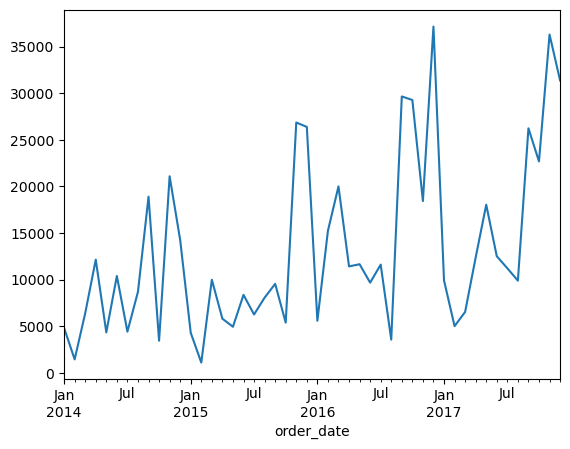

In [35]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date').resample('M')['sales'].sum().plot()